In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coupe_1 = ['2.B53', '2.B54']
coupe_2 = ['2.B55', '2.B56']
coupe_3 = ['2.B57', '2.B58']
coupe_4 = ['2.B59', '2.B60']

coupes = [coupe_1, coupe_2, coupe_3, coupe_4]

kamer_1 = 'Data_clean/Alta_sensors/2P01_combined.xlsx'
kamer_2 = 'Data_clean/Alta_sensors/2P02_combined.xlsx'
kamer_3 = 'Data_clean/Alta_sensors/2P03_combined.xlsx'
kamer_4 = 'Data_clean/Alta_sensors/2P04_combined.xlsx'

kamers = [kamer_1, kamer_2, kamer_3, kamer_4]

Kamer P01 has 6034 datapoints with 146.33 as mean
Kamer P02 has 9836 datapoints with 154.71 as mean
Kamer P03 has 6740 datapoints with 159.58 as mean
Kamer P04 has 9810 datapoints with 179.55 as mean


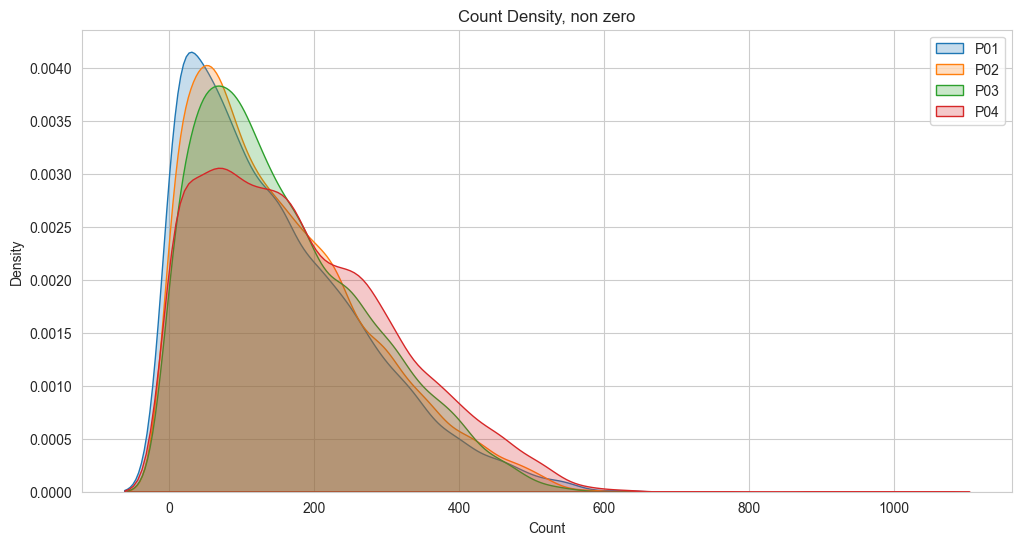

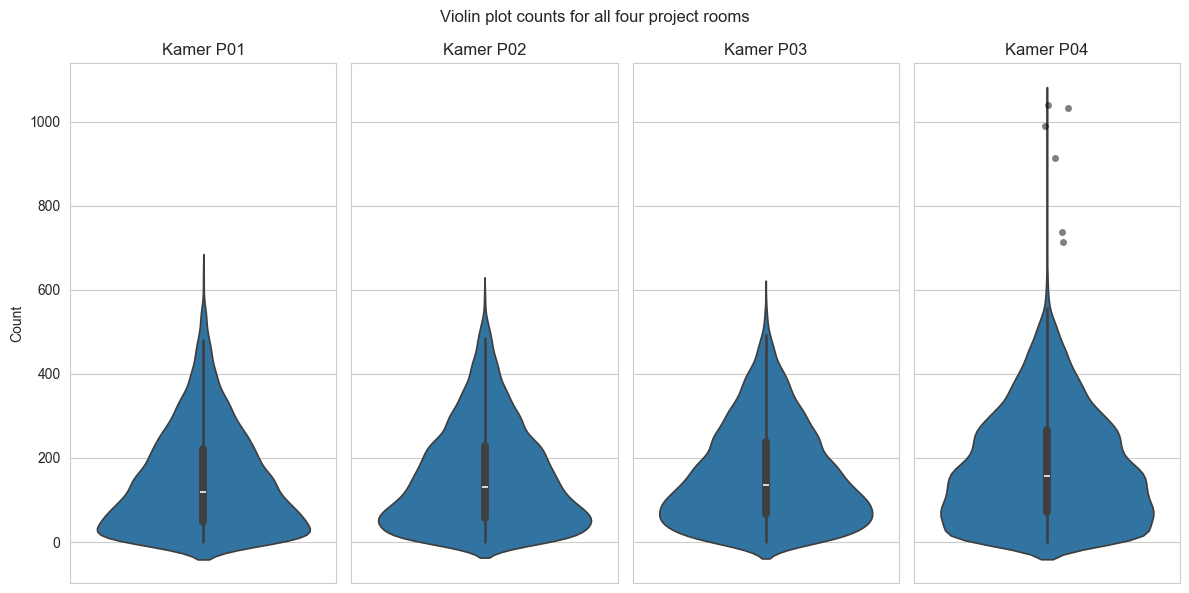

In [14]:
plt.figure(figsize=(12, 6))
for kamer in kamers:
    df = pd.read_excel(kamer)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]
    print(f"Kamer {kamer[25:28]} has {len(df)} datapoints with {df['Count'].mean():.2f} as mean")
    sns.kdeplot(df['Count'], label=kamer[25:28], fill=True)
    
plt.title('Count Density, non zero')
plt.xlabel('Count')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


fig, axes = plt.subplots(1, len(kamers), figsize=(12, 6), sharey=True)
for i, kamer in enumerate(kamers):
    df = pd.read_excel(kamer)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Count'] != 0]
    sns.violinplot(y='Count', data=df, ax=axes[i])
    axes[i].set_title(f'Kamer {kamer[25:28]}')
    axes[i].set_ylabel('Count')
    df_above_700 = df[df['Count'] > 700]
    sns.stripplot(y='Count', data=df_above_700, ax=axes[i], color='black', alpha=0.5)

plt.suptitle('Violin plot counts for all four project rooms')
plt.tight_layout()
plt.show()
